### **<span style="color:green">VISÃO GERAL DA BASE DE DADOS: Titanic</span>**

Esta base de dados contém informações sobre os passageiros do Titanic, o famoso navio que afundou em 1912. Ela é amplamente utilizada para análises de sobrevivência e para entender os fatores que influenciaram a sobrevivência dos passageiros. Aqui estão algumas das variáveis incluídas:

- **PassengerId**: Identificador único de cada passageiro.
- **Survived**: Indica se o passageiro sobreviveu (1) ou não (0).
- **Pclass**: Classe do bilhete do passageiro (1ª, 2ª, 3ª).
- **Name**: Nome do passageiro.
- **Sex**: Sexo do passageiro.
- **Age**: Idade do passageiro.
- **SibSp**: Número de irmãos/cônjuges a bordo do Titanic.
- **Parch**: Número de pais/filhos a bordo do Titanic.
- **Ticket**: Número do bilhete.
- **Fare**: Tarifa paga pelo bilhete.
- **Cabin**: Número da cabine.
- **Embarked**: Porto de embarque (C = Cherbourg; Q = Queenstown; S = Southampton).

A meta é entender como diferentes características dos passageiros e suas condições de viagem podem influenciar a probabilidade de sobrevivência no naufrágio do Titanic. Essa base de dados pode ser usada para diversas análises, como identificar padrões de sobrevivência, visualizar tendências demográficas dos passageiros e realizar previsões sobre fatores que afetaram as chances de sobrevivência.

Link para a competição do Kaggle: https://www.kaggle.com/competitions/titanic/overview

---

### **<span style="color:green">IMPORTS E CONFIGURAÇÕES</span>**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve, roc_curve, accuracy_score, precision_score, recall_score, auc
import matplotlib.pyplot as plt

#!pip install ipywidgets

In [2]:
# prompt: Crie para mim um método que recebe uma lista de textos e exiba um conjunto de radio buttons

import ipywidgets as widgets
from IPython.display import display

def exibir_alternativas(textos):
  radio_buttons = widgets.RadioButtons(
      options=textos,
      description='',
      disabled=False
  )
  display(radio_buttons)

In [3]:
def calcular_roc_auc(y_true, y_pred):
    # Calcular a curva ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred)
    
    # Calcular a área sob a curva (AUC)
    roc_auc = auc(fpr, tpr)
    
    return roc_auc

In [4]:
def plot_roc_auc(y_true, y_pred):
    # Gerar curva de precisão-revocação
    precision, recall, _ = precision_recall_curve(y_true, y_pred)

    plt.figure(figsize=(14, 7))

    # Subplot para a curva de precisão-revocação
    plt.subplot(1, 2, 1)
    plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

    # Subplot para a curva ROC
    fpr, tpr, _ = roc_curve(y_true, y_pred)

    plt.subplot(1, 2, 2)
    plt.plot(fpr, tpr, marker='.', label='ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

    # Mostrar os gráficos
    plt.show()

### **<span style="color:green">VISÃO GERAL DOS DADOS</span>**

In [5]:
CAMINHO_BASE_TREINAMENTO = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/titanic/train.csv'
CAMINHO_BASE_TESTE = 'C:/Users/clayt/Projetos/IDP/ml-01/dados/titanic/test.csv'

Função que recebe um path de um csv e retorna um dataframe

In [6]:
def carregar_dados(path: str):
  dados = pd.read_csv(path)
  return dados

In [7]:
def obter_treino_e_teste(df: pd.DataFrame, perc_treino: float = 0.8):
    treino, teste = train_test_split(df, train_size=perc_treino ,random_state=42)
    return treino, teste  

Utilize a função `carregar_dados(path: str)` para obter um dataframe a partir da planilha train.csv (CAMINHO_BASE_TREINAMENTO)

In [8]:
df = carregar_dados(path=CAMINHO_BASE_TREINAMENTO)

Liste as 3 primeiras linhas do dataframe utilizando a função `head()`

In [9]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


Liste as últimas linhas do dataframe utilizando a função `tail()`

In [10]:
df.tail(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


Utilize a função `info()` para responder as seguintes perguntas: Existem colunas com valores vazios? Quais são os tipos dos dados? Quantas linhas tem o arquivo? 

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Existem valores discrepantes em colunas do dataframe? Utilize a função `describe()` para isso.

In [12]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### **<span id="id_secao_prevendo_sobreviventes" style="color:green">PREVEJA OS SOBREVIVENTES</span>**

Utilize o train_test_split do pacote sklearn.model_selection para dividir os dados em treinamento e teste. Em geral, utilizam-se (80-70)% para treino (30-20)% por cento para testes. 

In [13]:
treino, teste = obter_treino_e_teste(df)

Crie o X e y de treino e teste conforme apresentado nos últimos notebooks. Utilize apenas as colunas <span style="color:red">'Pclass', 'Fare', 'SibSp', 'Parch'</span> nesse primeiro momento. **Dica**: Crie um array para armazenar as colunas para facilitar a inclusão ou remoção de features.  

In [14]:
cols_to_predict = ['Pclass', 'Fare', 'SibSp', 'Parch']

In [15]:
x_treino = treino[cols_to_predict]
y_treino = treino['Survived']

x_teste = teste[cols_to_predict]
y_teste = teste['Survived']

Treine o modelo LinearRegression

In [16]:
from sklearn.linear_model import LogisticRegression

linear_model = LogisticRegression()
linear_model.fit(X=x_treino, y=y_treino)

LogisticRegression()

Faça previsões do valor médio dos imóveis e compare os valores reais e os valores previstos. 

In [17]:
ypred = linear_model.predict(X=x_teste)

print(f'Valores Reais: {y_teste.to_list()[:5]}')
print(f'Valores previstos: {ypred[:5]}')

Valores Reais: [1, 0, 0, 1, 1]
Valores previstos: [0 0 0 0 0]


### **<span style="color:green">AVALIE O DESEMPENHO DO MODELO</span>**

**Revisão das principais métricas de Avaliação para Algoritmos de Classificação**

- **Acurácia** mede a proporção de previsões corretas em relação ao total de previsões.
- **Precisão** avalia a proporção de verdadeiros positivos em relação ao total de positivos previstos.
- **Recall (Revocação)** mede a proporção de verdadeiros positivos em relação ao total de positivos reais.

Importe essas métricas do modlo metrics do sklearn.

In [18]:
acuracia = accuracy_score(y_pred=ypred, y_true=y_teste)
precisao = precision_score(y_pred=ypred, y_true=y_teste)
revocacao = recall_score(y_pred=ypred, y_true=y_teste)
roc_auc = calcular_roc_auc(y_pred=ypred, y_true=y_teste)

Imprima os valores das métricas.

In [19]:
print(f'Acurácia: {round(acuracia, 5)}')
print(f'Precisão: {round(precisao, 5)}')
print(f'Revocação: {round(revocacao, 5)}')
print(f'ROC-AUC: {round(roc_auc, 5)}')

Acurácia: 0.71508
Precisão: 0.70175
Revocação: 0.54054
ROC-AUC: 0.68932


Utilize a função `plot_roc_auc()`, desenvolvida por nós em momentos anteriores, para visualizar a o gráfico de curva roc_auc. 

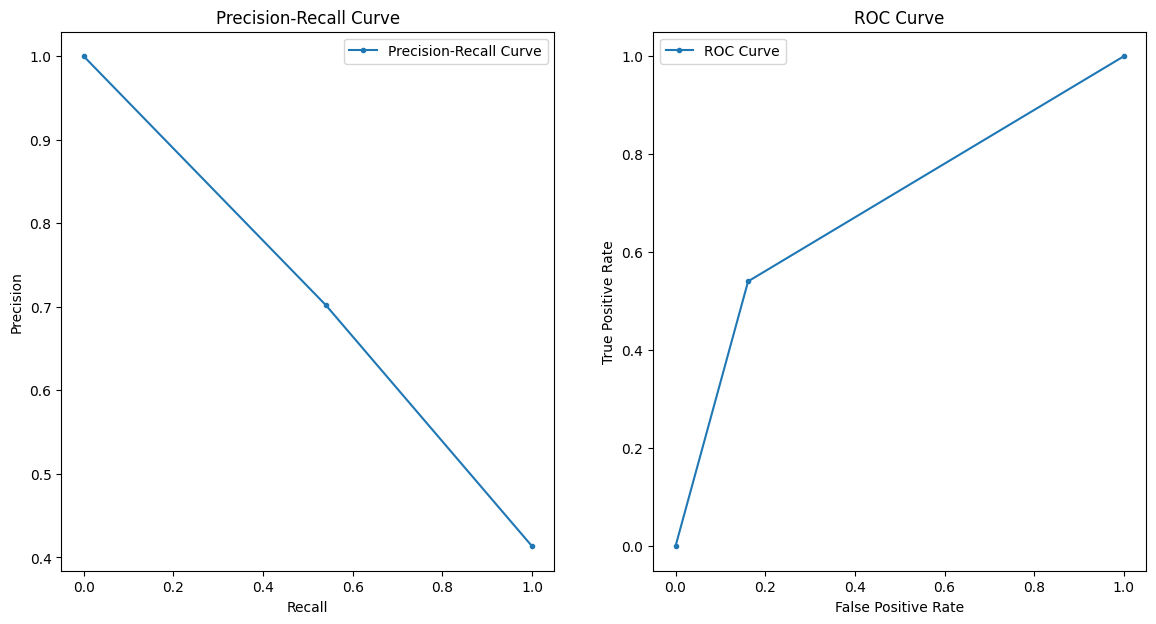

In [20]:
plot_roc_auc(y_true=y_teste, y_pred=ypred)

**Importância da Curva ROC e AUC**

**Curva ROC**
- **Avaliação Visual**: Mostra a relação entre a taxa de verdadeiros positivos (TPR) e a taxa de falsos positivos (FPR).
- **Comparação de Modelos**: Permite comparar diferentes modelos de classificação.
- **Detecção de Desempenho**: Ajuda a identificar se o modelo está performando bem.

**AUC (Área Sob a Curva)**
- **Resumo Numérico**: Fornece um valor que resume a performance do modelo, variando de 0 a 1.
- **Independência do Limiar**: Avalia a habilidade do modelo sem depender de um limiar específico.
- **Probabilidade de Classificação Correta**: Indica a probabilidade de classificar corretamente pares de exemplos positivos e negativos.

Esse modelo tem uma boa performance? Certamente, não! Um modelo que preveja que todos os homens morrem e todas as mulheres sobrevivem é melhor do que o modelo que acabamos de treinar.

In [21]:
from copy import copy

temp = copy(teste)
temp['Survived'] = temp['Sex'].map(lambda sex: 1 if sex=='female' else 0)

acuracia = accuracy_score(y_pred=temp['Survived'], y_true=y_teste)
precisao = precision_score(y_pred=temp['Survived'], y_true=y_teste)
revocacao = recall_score(y_pred=temp['Survived'], y_true=y_teste)
roc_auc = calcular_roc_auc(y_pred=temp['Survived'], y_true=y_teste)

print(f'Acurácia: {round(acuracia, 5)}')
print(f'Precisão: {round(precisao, 5)}')
print(f'Revocação: {round(revocacao, 5)}')
print(f'ROC-AUC: {round(roc_auc, 5)}')

Acurácia: 0.78212
Precisão: 0.75362
Revocação: 0.7027
ROC-AUC: 0.7704


### **<span style="color:green">CRIE NOVAS CARACTERÍSTICAS(FEATURE ENGINEERING) E REAVALIE O MODELO</span>**

Como você pode observar no gráfico da seção anterior, o sexo é uma feature(característica, atributo) importante, visto que um modelo que prevê que todos os homens morrem e todas as mulheres vivem é muito superior ao primeiro modelo que trabalhamos. O problema é que essa feature não pode ser submetida aos algoritmos de Machine Learning porque é uma string. Converta essa feature para inteiro utilizando a função `map()` do pandas. 

In [356]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [22]:
df.Sex = df.Sex.map({'male': 0, 'female': 1})
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C


É razoável supor que crianças tiveram prioridade de embarque nos botes salva-vidas. Crie um atributo para indicar se o passageiro é criança ou adulto. **DICA**: Utilize essa feature com a função `map()` combinada com expressão lambda.

In [23]:
df['isChild'] = df.Age.map(lambda age: 1 if age < 0 else 0)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,isChild
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,0


Utilize o método `obter_treino_e_teste(df=df)` para dividir o dataframe df em treino e teste. Instancie, treine, faça previsões.

In [ ]:
cols_to_predict = ['Pclass', 'Fare', 'SibSp', 'Parch', 'Sex', 'isChild']

treino, teste = obter_treino_e_teste(df=df)


linear_model = LogisticRegression()
linear_model.fit(X=treino[cols_to_predict], y=treino['Survived'])

ypred = linear_model.predict(X=teste[cols_to_predict])

Visualize a performance

In [25]:
acuracia = accuracy_score(y_pred=ypred, y_true=teste.Survived)
precisao = precision_score(y_pred=ypred, y_true=teste.Survived)
revocacao = recall_score(y_pred=ypred, y_true=teste.Survived)
roc_auc = calcular_roc_auc(y_pred=ypred, y_true=teste.Survived)

print(f'Acurácia: {round(acuracia, 5)}')
print(f'Precisão: {round(precisao, 5)}')
print(f'Revocação: {round(revocacao, 5)}')
print(f'ROC-AUC: {round(roc_auc, 5)}')

Acurácia: 0.78771
Precisão: 0.76471
Revocação: 0.7027
ROC-AUC: 0.77516


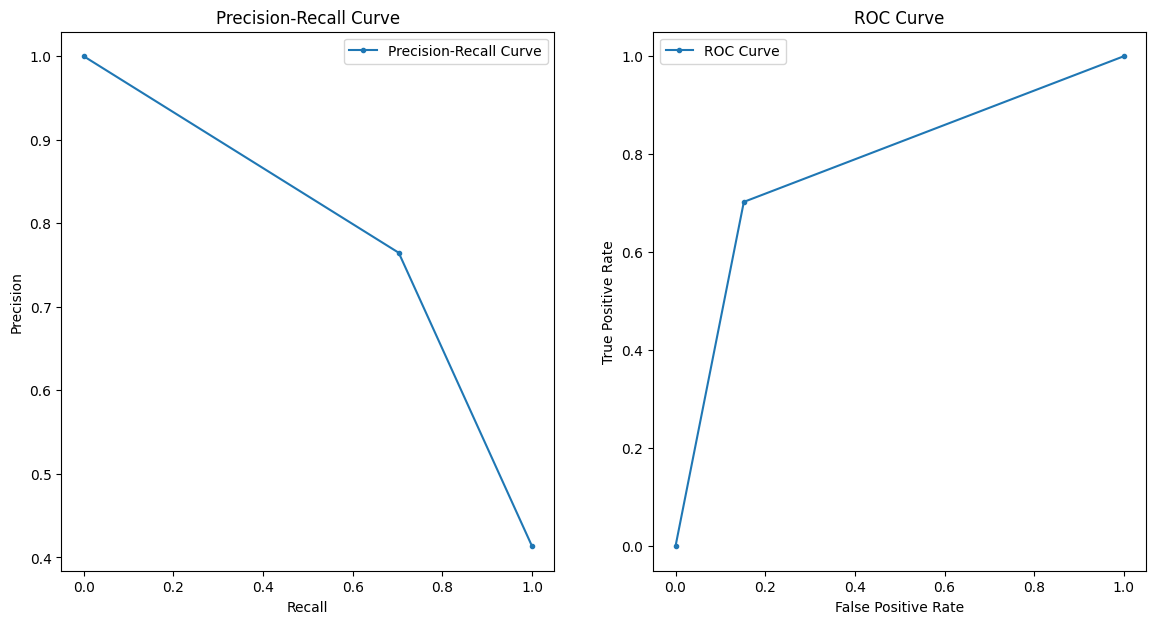

In [363]:
plot_roc_auc(y_true=teste.Survived, y_pred=ypred)